In [1]:
import analysis
import elbow
import iteration
import pandas as pd
%matplotlib inline
import numpy as np
import urllib.request

# Get data

In [2]:
# URL name
url = 'https://raw.githubusercontent.com/Padam-0/cluster_t-shirt_sizing/master/data.csv'

# File name
file_name = 'data/shirt.csv'

# Save csv files
urllib.request.urlretrieve(url, file_name)

('data/shirt.csv', <http.client.HTTPMessage at 0x4a7a8c4ba8>)

# Elbow plot

In [3]:
# Read data
data  = pd.read_csv(file_name)

# Lowercase column names
data.columns = map(str.lower, data.columns)

# Relevant columns
cols = ['chest circumference', 'waist circumference', 'shoulder-elbow length', 'erect sitting height', 'shoulder breadth']
data = data[cols]

Saved to plots/elbow.png


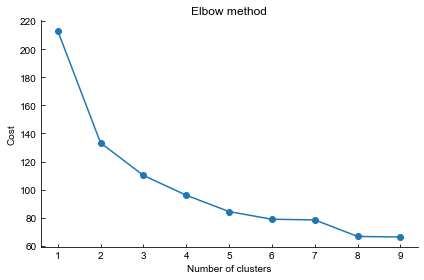

In [4]:
# Set the range of number of clusters
num_cluster = list(range(1, 10))

# Calculate cost function for each number of clusters
cost = []
for K in num_cluster:
    centroid_list = analysis.initialize(data, K)
    data_array = data.to_numpy()
    final_centroid, clusters = elbow.centroid_iteration(data_array, centroid_list, K)
    cost.append(elbow.cost_function(final_centroid, clusters, K))

# Plot elbow
elbow.plot_elbow(num_cluster, cost)

6 clusters look ok

# Implement k-means clustering for K = 6

In [5]:
K = 6

In [6]:
# Read data
data  = pd.read_csv(file_name)

# Lowercase column names
data.columns = map(str.lower, data.columns)

# Relevant columns
cols = ['chest circumference', 'waist circumference', 'shoulder-elbow length', 'erect sitting height', 'shoulder breadth']
working_data = data[cols]

# Remove rows with any zero
for column in cols:
    working_data = working_data[working_data[column] != 0]

In [7]:
# Convert data into array
data_array = working_data.to_numpy()

# Randomly initialize K points
centroid_list = analysis.initialize(working_data, K)

In [8]:
time = 0

while True:
    time += 1
    clusters = analysis.cluster_assignment(data_array, centroid_list, K)
    centroid_list = analysis.new_centroid(clusters, centroid_list)

    if np.allclose(centroid_list[-(K * 2) : -K], centroid_list[-K :]):
        break

In [9]:
output = iteration.export_table(clusters, working_data, centroid_list, K, "shirt_output.csv")

Saved csv to outputs


In [10]:
new_point = np.array([600, 600, 300, 600, 400])

In [11]:
iteration.find_cluster(new_point, centroid_list, K)

Cluster: 6
